In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import scipy as stats

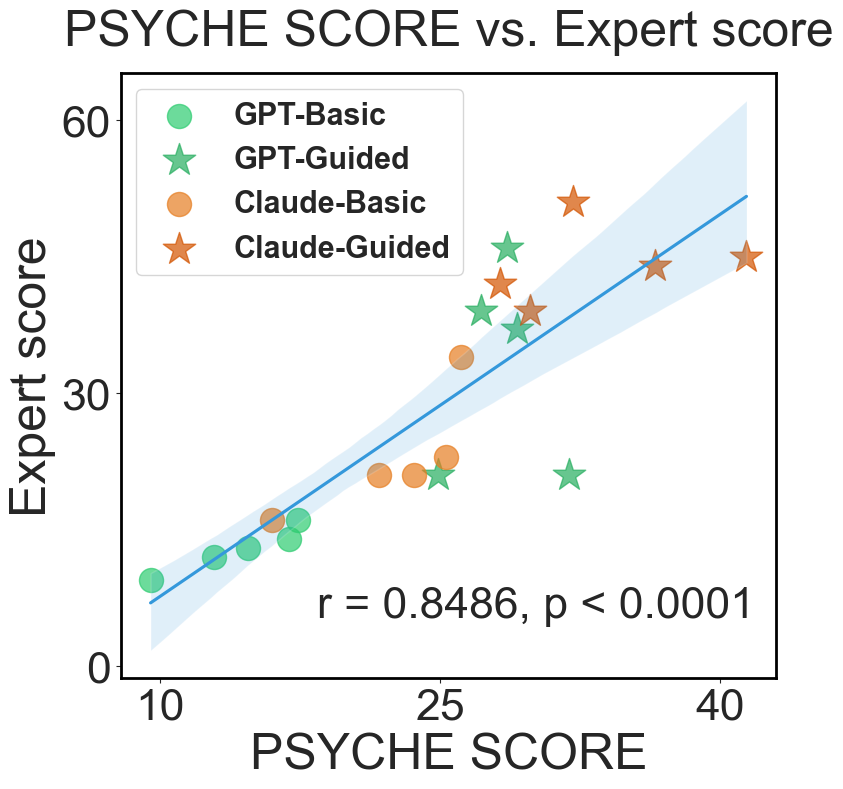

PSYCHE와 Expert의 전체 상관계수: 0.8486
GPT-Basic의 상관계수: 0.9694
GPT-Guided의 상관계수: -0.0160
Claude-Basic의 상관계수: 0.7858
Claude-Guided의 상관계수: 0.2846

기술 통계량:
          PSYCHE     Expert
count  20.000000  20.000000
mean   24.692500  28.225000
std     8.195574  13.534046
min     9.500000   9.500000
25%    17.275000  16.000000
50%    25.700000  22.000000
75%    29.275000  39.750000
max    41.400000  51.000000

그룹별 평균:
               PSYCHE  Expert
Group                        
Claude-Basic    22.55    23.0
Claude-Guided   33.60    44.2
GPT-Basic       14.28    12.9
GPT-Guided      28.34    32.8


In [14]:
# Helvetica 폰트
rcParams['font.family'] = 'Helvetica'

# CSV 파일 읽기
df = pd.read_csv(
    '/Users/inw/Desktop/연구/matplotlib/data_psyche/correlation_expert_revised.csv')

# 그룹 정보 추가
groups = [
    "GPT-Basic", "Claude-Basic", "GPT-Basic", "Claude-Guided", "GPT-Guided",
    "Claude-Basic", "GPT-Guided", "Claude-Guided", "GPT-Basic", "Claude-Basic",
    "GPT-Guided", "Claude-Guided", "GPT-Guided", "Claude-Basic", "GPT-Basic",
    "Claude-Guided", "GPT-Basic", "GPT-Guided", "Claude-Guided", "Claude-Basic"
]
df['Group'] = groups

# Seaborn 스타일 설정 - 격자 제거
sns.set_style("ticks")
plt.figure(figsize=(8, 8))

# 새로운 색상 매핑
color_map = {
    "GPT-Basic": "#2ecc71",     # 초록색 계열
    "GPT-Guided": "#27ae60",    # 진한 초록색 계열
    "Claude-Basic": "#e67e22",  # 주황색 계열
    "Claude-Guided": "#d35400"  # 진한 주황색 계열
}

# 마커 스타일과 크기 매핑
marker_map = {
    "GPT-Basic": {"marker": "o", "size": 300},
    "GPT-Guided": {"marker": "*", "size": 600},  # 별 크기 증가
    "Claude-Basic": {"marker": "o", "size": 300},
    "Claude-Guided": {"marker": "*", "size": 600}  # 별 크기 증가
}

# Scatter plot 그리기
for group in color_map:
    group_data = df[df['Group'] == group]
    plt.scatter(group_data['PSYCHE'], group_data['Expert'],
                c=color_map[group],
                marker=marker_map[group]["marker"],
                s=marker_map[group]["size"],
                label=group,
                alpha=0.7)

# 회귀선 추가 - 파란색 계열로 변경
sns.regplot(x='PSYCHE', y='Expert', data=df,
            scatter=False,
            color='#3498db',  # 파란색 계열
            line_kws={'linestyle': '-'})

# Correlation 계산
correlation, p_value = stats.stats.pearsonr(df['PSYCHE'], df['Expert'])

# 제목과 레이블 설정 - 기본 폰트 사용
plt.title('PSYCHE SCORE vs. Expert score', fontsize=36, pad=20)
plt.xlabel('PSYCHE SCORE', fontsize=36)
plt.ylabel('Expert score', fontsize=36)
plt.yticks(ticks=[0, 30, 60], fontsize=32)
plt.xticks(ticks=[10, 25, 40], fontsize=32)

# 범례 추가
plt.legend(loc='upper left', prop={'size': 22, 'weight': 'bold'})

# 상관계수 텍스트 추가
# 상관계수 텍스트 추가
if p_value < 0.0001:
    p_text = 'p < 0.0001'
else:
    p_text = f'p = {p_value:.4f}'

plt.text(0.3, 0.10, f'r = {correlation:.4f}, {p_text}',
         transform=plt.gca().transAxes,
         fontsize=32)


# 테두리만 검은색으로 설정
ax = plt.gca()
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# 테두리 굵기 조정
line_width = 2  # 원하는 굵기 설정
ax.spines['top'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
ax.spines['right'].set_linewidth(line_width)

# 그래프 저장 및 표시
plt.tight_layout()
plt.savefig('/Users/inw/Desktop/연구/matplotlib/figure_psyche/psyche_expert_correlation_revised_size.png',
            dpi=300, bbox_inches='tight')
plt.show()

# 통계 정보 출력
print(f"PSYCHE와 Expert의 전체 상관계수: {correlation:.4f}")

# 그룹별 상관계수 계산 및 출력
for group in color_map:
    group_data = df[df['Group'] == group]
    group_correlation = group_data['PSYCHE'].corr(group_data['Expert'])
    print(f"{group}의 상관계수: {group_correlation:.4f}")

# 기술 통계량 출력
print("\n기술 통계량:")
print(df[['PSYCHE', 'Expert']].describe())

# 그룹별 평균 출력
print("\n그룹별 평균:")
print(df.groupby('Group')[['PSYCHE', 'Expert']].mean())

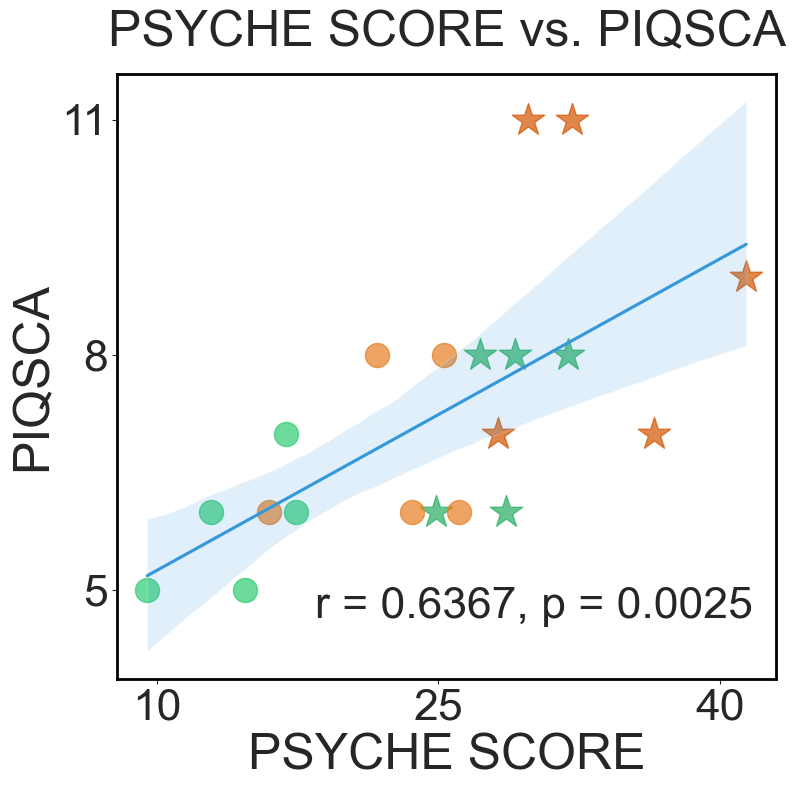

PSYCHE와 piqsca의 전체 상관계수: 0.6367
GPT-Basic의 상관계수: 0.6473
GPT-Guided의 상관계수: 0.5644
Claude-Basic의 상관계수: 0.2211
Claude-Guided의 상관계수: -0.1305

기술 통계량:
          PSYCHE     PIQSCA
count  20.000000  20.000000
mean   24.692500   7.200000
std     8.195574   1.704483
min     9.500000   5.000000
25%    17.275000   6.000000
50%    25.700000   7.000000
75%    29.275000   8.000000
max    41.400000  11.000000

그룹별 평균:
               PSYCHE  PIQSCA
Group                        
Claude-Basic    22.55     6.8
Claude-Guided   33.60     9.0
GPT-Basic       14.28     5.8
GPT-Guided      28.34     7.2


In [15]:
# Helvetica 폰트
rcParams['font.family'] = 'Helvetica'

# CSV 파일 읽기
df = pd.read_csv(
    '/Users/inw/Desktop/연구/matplotlib/data_psyche/correlation_expert_revised.csv')

# 그룹 정보 추가
groups = [
    "GPT-Basic", "Claude-Basic", "GPT-Basic", "Claude-Guided", "GPT-Guided",
    "Claude-Basic", "GPT-Guided", "Claude-Guided", "GPT-Basic", "Claude-Basic",
    "GPT-Guided", "Claude-Guided", "GPT-Guided", "Claude-Basic", "GPT-Basic",
    "Claude-Guided", "GPT-Basic", "GPT-Guided", "Claude-Guided", "Claude-Basic"
]
df['Group'] = groups


# CSV 파일 읽기
df = pd.read_csv(
    '/Users/inw/Desktop/연구/matplotlib/data_psyche/correlation_piqsca_revised.csv')

# Helvetica 폰트
rcParams['font.family'] = 'Helvetica'

# 그룹 정보 추가
groups = [
    "GPT-Basic", "Claude-Basic", "GPT-Basic", "Claude-Guided", "GPT-Guided",
    "Claude-Basic", "GPT-Guided", "Claude-Guided", "GPT-Basic", "Claude-Basic",
    "GPT-Guided", "Claude-Guided", "GPT-Guided", "Claude-Basic", "GPT-Basic",
    "Claude-Guided", "GPT-Basic", "GPT-Guided", "Claude-Guided", "Claude-Basic"
]
df['Group'] = groups

# Seaborn 스타일 설정 - 격자 제거
sns.set_style("ticks")

plt.figure(figsize=(8, 8))

# 새로운 색상 매핑
color_map = {
    "GPT-Basic": "#2ecc71",     # 초록색 계열
    "GPT-Guided": "#27ae60",    # 진한 초록색 계열
    "Claude-Basic": "#e67e22",  # 주황색 계열
    "Claude-Guided": "#d35400"  # 진한 주황색 계열
}

# 마커 스타일과 크기 매핑
marker_map = {
    "GPT-Basic": {"marker": "o", "size": 300},
    "GPT-Guided": {"marker": "*", "size": 600},  # 별 크기 증가
    "Claude-Basic": {"marker": "o", "size": 300},
    "Claude-Guided": {"marker": "*", "size": 600}  # 별 크기 증가
}

# Scatter plot 그리기
for group in color_map:
    group_data = df[df['Group'] == group]
    plt.scatter(group_data['PSYCHE'], group_data['PIQSCA'],
                c=color_map[group],
                marker=marker_map[group]["marker"],
                s=marker_map[group]["size"],
                label=group,
                alpha=0.7)

# 회귀선 추가 - 파란색 계열로 변경
sns.regplot(x='PSYCHE', y='PIQSCA', data=df,
            scatter=False,
            color='#3498db',  # 파란색 계열
            line_kws={'linestyle': '-'})

# Correlation 계산
correlation, p_value = stats.stats.pearsonr(df['PSYCHE'], df['PIQSCA'])

# 제목과 레이블 설정 - 기본 폰트 사용
plt.title('PSYCHE SCORE vs. PIQSCA', fontsize=36, pad=20)
plt.xlabel('PSYCHE SCORE', fontsize=36)
plt.ylabel('PIQSCA', fontsize=36)
plt.yticks(ticks=[5, 8, 11], fontsize=32)
plt.xticks(ticks=[10, 25, 40], fontsize=32)


# 상관계수 텍스트 추가
plt.text(0.3, 0.10, f'r = {correlation:.4f}, p = {p_value:.4f}',
         transform=plt.gca().transAxes,
         fontsize=32)


# 테두리만 검은색으로 설정
ax = plt.gca()
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# 테두리 굵기 조정
line_width = 2  # 원하는 굵기 설정
ax.spines['top'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
ax.spines['right'].set_linewidth(line_width)

# 그래프 저장 및 표시
plt.tight_layout()
plt.savefig('/Users/inw/Desktop/연구/matplotlib/figure_psyche/psyche_piqsca_correlation_revised_size.png',
            dpi=300, bbox_inches='tight')
plt.show()

# 통계 정보 출력
print(f"PSYCHE와 piqsca의 전체 상관계수: {correlation:.4f}")

# 그룹별 상관계수 계산 및 출력
for group in color_map:
    group_data = df[df['Group'] == group]
    group_correlation = group_data['PSYCHE'].corr(group_data['PIQSCA'])
    print(f"{group}의 상관계수: {group_correlation:.4f}")

# 기술 통계량 출력
print("\n기술 통계량:")
print(df[['PSYCHE', 'PIQSCA']].describe())

# 그룹별 평균 출력
print("\n그룹별 평균:")
print(df.groupby('Group')[['PSYCHE', 'PIQSCA']].mean())